# Of All energy types, which are the most prevalent worldwide?
### Data source: data.UN.org Energy Statistics Database

## i.Data Cleansing

### i.a. Combining & Merging

#### Energy sources are in separate csv files.  Many data sources need to be combined into one.

In [53]:
#combining all datasets using map function

import glob
import pandas as pd 

#map renewables

df_renew = pd.concat(map(pd.read_csv, glob.glob('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/raw_data_renewable/*.csv')))
df_renew.rename(columns={'Country or Area':'Geo'}, inplace=True)

#map nonrenewables

df_nonrenew = pd.concat(map(pd.read_csv, glob.glob('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/raw_data_nonrenewable/*.csv')))
df_nonrenew.rename(columns={'Country or Area':'Geo'}, inplace=True)

df = pd.concat([df_renew, df_nonrenew])

#split commodity and transaction into two columns
#defining column to split and which delimiter
ct = df['Commodity - Transaction'].str.split('-')

#assigning new columns
df['Commodity'] = ct.str.get(0)
df['Transaction'] = ct.str.get(1)

#lowercase and remove trailing and leading spaces
df['Commodity'] = df['Commodity'].str.lower()
df['Commodity'] = df['Commodity'].str.strip()

df['Transaction'] = df['Transaction'].str.lower()
df['Transaction'] = df['Transaction'].str.strip()

df = df[df['Transaction'] == 'production']

#df.shape




(80943, 8)

In [23]:
#import dataframe with conversion units
import pandas as pd 
unit_conv = pd.read_csv('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/renewable_energy_units_conv_2.csv')

In [24]:
#merge dataframes with conversion units

df_merge = pd.merge(df,  
                     unit_conv,  
                     on ='Commodity', 
                     how ='left') 

df_merge['TJ'] = df_merge['Quantity'] * df_merge['Conv_mt_to_tj']
df_merge.sample(2)

,Geo,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes,Commodity,Transaction,Description,Units,Conv_mt_to_tj,r_type,TJ
57954,Russian Federation,Lubricants - Production,1995.0,"Metric tons, thousand",2550.0,NaN,lubricants,production,NaN,"Metric tons, thousand",40.2,nonrenewable,102510.0
57939,Russian Federation,Lubricants - Production,2010.0,"Metric tons, thousand",2723.0,NaN,lubricants,production,NaN,"Metric tons, thousand",40.2,nonrenewable,109464.6


## ii.All Energy Sources Metrics 2018

#### All energy sources 'production'

In [25]:

#sum all energy sources by year from 1990 to 2018
lt_2019 = df_merge[df_merge['Year'] < 2019]
tot_grp_year = lt_2019.groupby(['Year'])
df_tot_year = tot_grp_year['TJ'].agg(['sum'])

#sum all renewables
lt_2019_r = df_merge[(df_merge['Year'] < 2019) & (df_merge['r_type'] == 'renewable')]
tot_r_grp_year = lt_2019_r.groupby(['Year'])
df_tot_year_r = tot_r_grp_year['TJ'].agg(['sum'])

#sum all nonrenewables
lt_2019_n = df_merge[(df_merge['Year'] < 2019) & (df_merge['r_type'] == 'nonrenewable')]
tot_n_grp_year = lt_2019_n.groupby(['Year'])
df_tot_year_n = tot_n_grp_year['TJ'].agg(['sum'])

In [26]:
# ***sum renewable & nonrenewable in the same way and change plot below to subplot w/ three lines

In [27]:
allsources_r = pd.merge(df_tot_year,  
                     df_tot_year_r,  
                     on ='Year', 
                     how ='left') 

allsources_r_n = pd.merge(allsources_r,
                    df_tot_year_n,
                    on = 'Year', 
                    how = 'left')

allsources_r_n.rename(columns={'sum_x':'total', 'sum_y': 'renew', 'sum' : 'nonrenew'}, inplace=True)
#allsources_r_n['diff'] = allsources_r_n['renew'] + allsources_r_n['nonrenew']#

allsources_r_n.head()

,total,renew,nonrenew
Year,,,
1990.0,5.985921e+08,1.616509e+08,4.369413e+08
1991.0,5.103260e+08,7.344270e+07,4.368833e+08
1992.0,5.242486e+08,7.407710e+07,4.501715e+08
1993.0,6.442040e+08,1.942252e+08,4.499788e+08
1994.0,5.310074e+08,7.610320e+07,4.549042e+08


AxesSubplot(0.125,0.125;0.775x0.755)


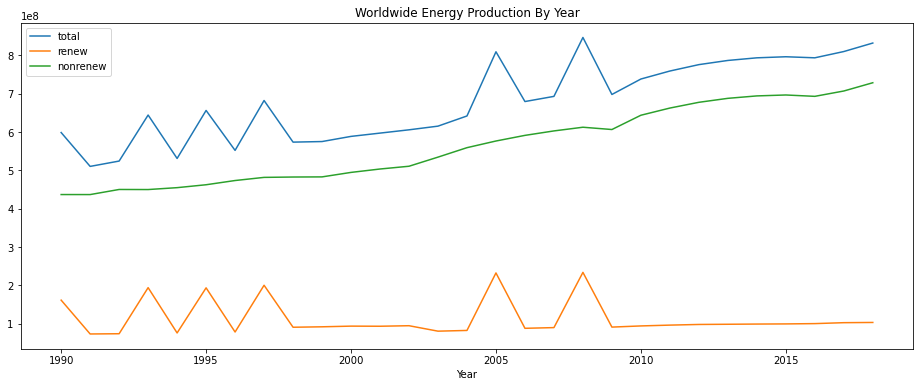

In [42]:
import matplotlib.pyplot as plt 

df_tot_year.sort_values(by='Year', ascending=True, inplace=True)
df_tot_year_r.sort_values(by='Year', ascending=True, inplace=True)
df_tot_year_n.sort_values(by='Year', ascending=True, inplace=True)

print(allsources_r_n.plot(figsize=(16,6), title='Worldwide Energy Production By Year'))


In [49]:
#what was the percent renewable in 2018?

df_r_type_18 = df_merge[df_merge['Year'] == 2018]
r_grp_18 = df_r_type_18.groupby(['r_type'])
sum_r_type_18 = r_grp_18['TJ'].agg(['sum'])
sum_r_type_18['percent'] = (sum_r_type_18['sum'] / sum_r_type_18['sum'].sum()) * 100
sum_r_type_18.head()

,sum,percent
r_type,,
nonrenewable,7.284437e+08,87.561837
renewable,1.034755e+08,12.438163


#### Percent renewable?

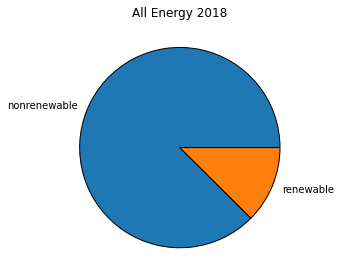

In [45]:
from matplotlib import pyplot as plt 

pie = sum_r_type_18['sum']
labels = ['nonrenewable', 'renewable']

#plt.style.use("fivethirtyeight")

plt.pie(pie, labels=labels, wedgeprops={'edgecolor':'black'})
plt.title("All Energy 2018")
plt.tight_layout()
plt.show()



In [47]:
#what was the percent renewable in 2013?
df_r_type_13 = df_merge[df_merge['Year'] == 2013]
r_grp_13 = df_r_type_13.groupby(['r_type'])
sum_r_type_13 = r_grp_13['TJ'].agg(['sum'])
sum_r_type_13['percent'] = (sum_r_type_13['sum'] / sum_r_type_13['sum'].sum()) * 100
sum_r_type_13.head()

,sum,percent
r_type,,
nonrenewable,6.877688e+08,87.443361
renewable,9.876181e+07,12.556639


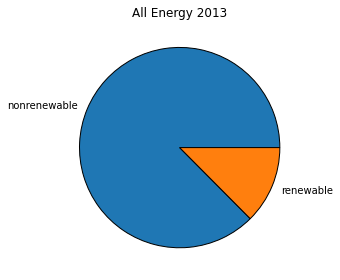

In [32]:
from matplotlib import pyplot as plt 

pie = sum_r_type_13['sum']
labels = ['nonrenewable', 'renewable']

#plt.style.use("fivethirtyeight")

plt.pie(pie, labels=labels, wedgeprops={'edgecolor':'black'})
plt.title("All Energy 2013")
plt.tight_layout()
plt.show()

In [33]:
#filter 2018, group by Commodity, sum of TJ
df_2018 = df_merge[df_merge['Year'] == 2018]
comm_grp_18 = df_2018.groupby(['Commodity'])
sum_2018 = comm_grp_18['TJ'].agg(['sum'])

#same thing for 2013

df_2013 = df_merge[df_merge['Year'] == 2013]
comm_grp_13 = df_2013.groupby(['Commodity'])
sum_2013 = comm_grp_13['TJ'].agg(['sum'])



In [34]:
#change 'sum' heading to TJ 2018, TJ 2013
sum_2018.rename(columns={'sum' : 'Total TJ 2018'}, inplace=True)
sum_2013.rename(columns={'sum' : 'Total TJ 2013'}, inplace=True)

In [35]:
#combine 2018 and 2013 data frames to get percentage change
allsources_change = pd.concat([sum_2013, sum_2018], axis='columns', sort=False)

In [36]:
sum_2018.head()

,Total TJ 2018
Commodity,
additives and oxygenates,1.450680e+05
animal waste,6.828780e+05
anthracite,1.099642e+06
aviation gasoline,7.265971e+04
bagasse,3.575350e+06


AxesSubplot(0.125,0.125;0.775x0.755)


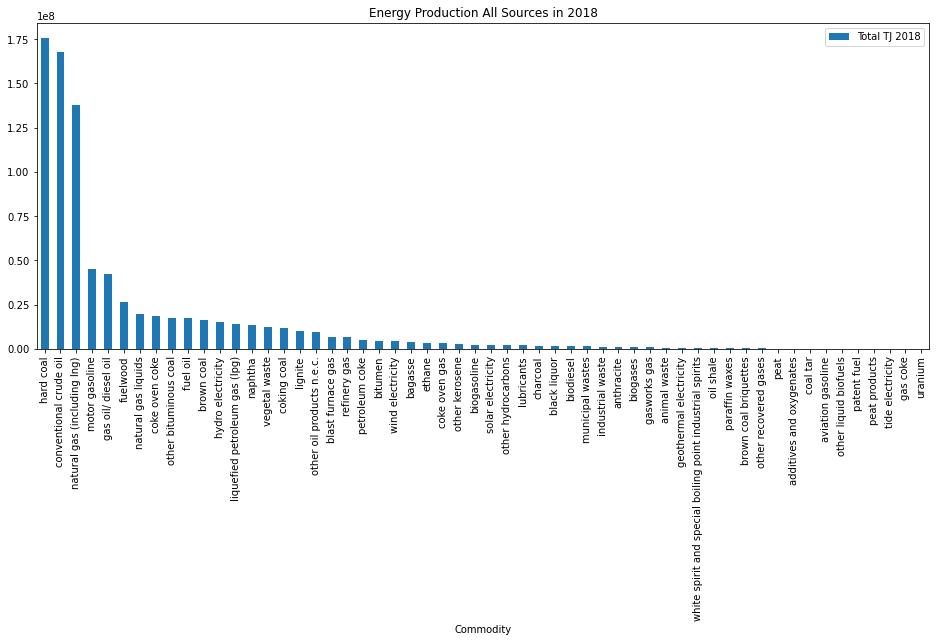

In [43]:
import matplotlib.pyplot as plt 

# pc_only = allsources_change.drop(['Total TJ 2018', 'Total TJ 2013', 'change'],axis=1)
# pc_only.sort_values(by='perc_change', ascending=False, inplace=True)
sum_2018.sort_values(by='Total TJ 2018', ascending=False, inplace=True)

print(sum_2018.plot(kind='bar', figsize=(16,6), title='Energy Production All Sources in 2018'))

AxesSubplot(0.125,0.125;0.775x0.755)


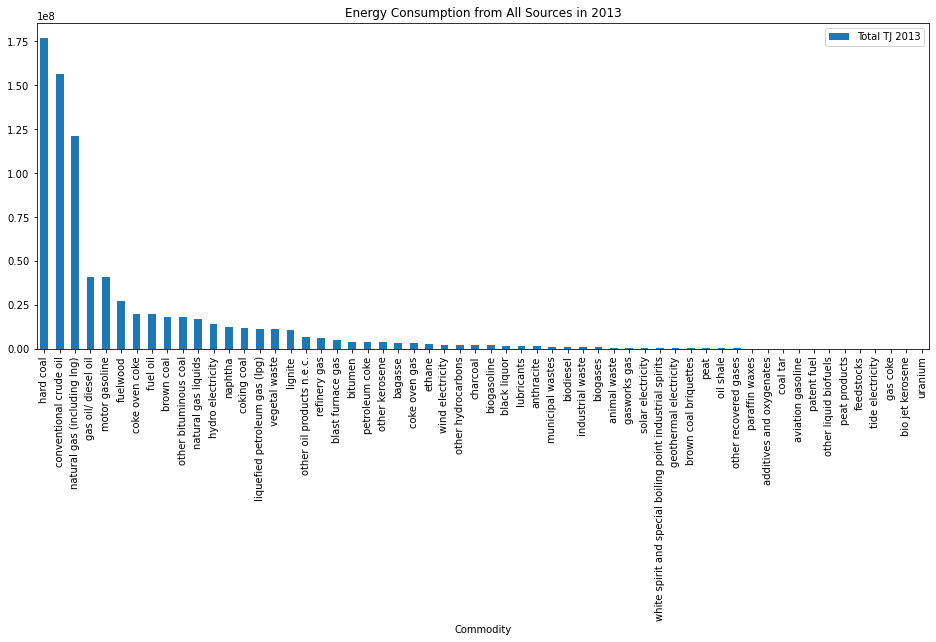

In [38]:
import matplotlib.pyplot as plt 

# pc_only = allsources_change.drop(['Total TJ 2018', 'Total TJ 2013', 'change'],axis=1)
# pc_only.sort_values(by='perc_change', ascending=False, inplace=True)
sum_2013.sort_values(by='Total TJ 2013', ascending=False, inplace=True)

print(sum_2013.plot(kind='bar', figsize=(16,6), title='Energy Production from All Sources in 2013'))

In [39]:
allsources_change['change'] = allsources_change['Total TJ 2018'] - allsources_change['Total TJ 2013']
allsources_change['perc_change'] = (allsources_change['change'] / allsources_change['Total TJ 2013']) * 100
allsources_change.sort_values(by='perc_change', ascending=False)

,Total TJ 2013,Total TJ 2018,change,perc_change
solar electricity,4.825813e+05,2.017290e+06,1.534709e+06,318.020831
wind electricity,2.312730e+06,4.542049e+06,2.229319e+06,96.393409
other liquid biofuels,2.926813e+04,5.152022e+04,2.225209e+04,76.028385
biodiesel,1.173613e+06,1.762222e+06,5.886089e+05,50.153564
paraffin waxes,1.326966e+05,1.883010e+05,5.560440e+04,41.903415
gasworks gas,5.603911e+05,7.891771e+05,2.287860e+05,40.826130
ethane,2.493861e+06,3.503525e+06,1.009664e+06,40.485981
other oil products n.e.c.,6.739093e+06,9.227959e+06,2.488866e+06,36.931762
blast furnace gas,4.991259e+06,6.578436e+06,1.587177e+06,31.799140
lubricants,1.450660e+06,1.910270e+06,4.596104e+05,31.682856


AxesSubplot(0.125,0.125;0.775x0.755)


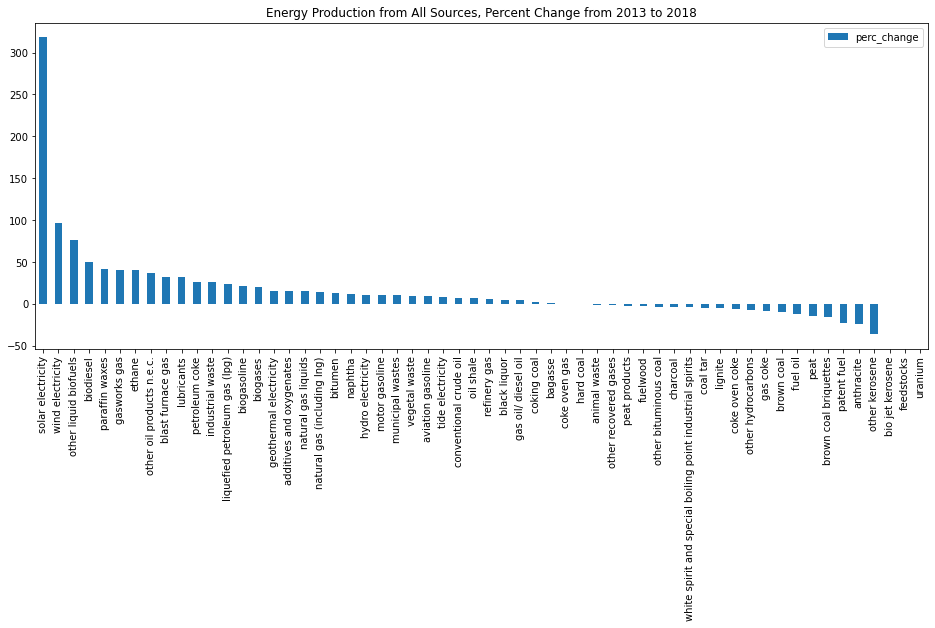

In [40]:
import matplotlib.pyplot as plt 

pc_only = allsources_change.drop(['Total TJ 2018', 'Total TJ 2013', 'change'],axis=1)
pc_only.sort_values(by='perc_change', ascending=False, inplace=True)


print(pc_only.plot(kind='bar', figsize=(16,6), title='Energy Production from All Sources, Percent Change from 2013 to 2018'))

## v.Insights